# Import Library

`data_loading` and `feature_engineering` are python files that I wrote. `data_loading` contains a function called load_data which you will use to load the dataframe, and `feature_engineering` contains a function called apply_feature_engineering which you will use to apply the feature engineering (so that we all use the same processed data in ML models).

**Before running this script, make sure you have downloaded 'itineraries_snappy.parquet' and are storing in a folder called 'data'**

You can upload these as normal libaries, as seen below:

In [1]:
from feature_engineering import apply_feature_engineering, add_dummies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import joblib

# Data Loading
Here is where you will call the load_data function from data_loading --> there are no parameters needed

In [2]:
def load_data():
    """
    Load the dataset using parquet and pyarrow
    """
    df = pd.read_parquet(
        "data/itineraries_snappy.parquet", 
        engine= "pyarrow", 
        columns= [
            "searchDate", 
            "flightDate", 
            "startingAirport", 
            "destinationAirport",
            "travelDuration", 
            "isBasicEconomy", 
            "isRefundable", 
            "isNonStop", 
            "totalFare", 
            "seatsRemaining", 
            "totalTravelDistance",
            "segmentsDepartureTimeRaw", 
            "segmentsAirlineCode", 
            "segmentsCabinCode"
        ]
    )
    return df

In [3]:
# Call the load_data to get the data as a pandas dataframe
df = load_data()
df.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineCode,segmentsCabinCode
0,2022-04-16,2022-04-17,ATL,BOS,PT2H29M,False,False,True,248.6,9,947.0,2022-04-17T12:57:00.000-04:00,DL,coach
1,2022-04-16,2022-04-17,ATL,BOS,PT2H30M,False,False,True,248.6,4,947.0,2022-04-17T06:30:00.000-04:00,DL,coach
2,2022-04-16,2022-04-17,ATL,BOS,PT2H30M,False,False,True,248.6,9,947.0,2022-04-17T11:35:00.000-04:00,DL,coach
3,2022-04-16,2022-04-17,ATL,BOS,PT2H32M,False,False,True,248.6,8,947.0,2022-04-17T13:59:00.000-04:00,DL,coach
4,2022-04-16,2022-04-17,ATL,BOS,PT2H34M,False,False,True,248.6,9,947.0,2022-04-17T09:59:00.000-04:00,DL,coach


In [4]:
# The data is too large to use in entirety, set a sample of 800,000 rows
sample_size = 800000

# Get the first 800,000 rows
df_sample = df.iloc[:sample_size]

# Feature Engineering
Here is where you will call the apply_feature_engineering function from feature_engineering --> there are no parameters needed

In [5]:
# Call the apply_feature_engineering function from feature_engineering to get the data ready for ML Modeling
df_sample = apply_feature_engineering(df_sample)

Starting feature engineering...
Converting date columns...
Date conversion done. Time elapsed: 0.31s
Extracting travel duration...
Travel duration extraction done. Time elapsed: 1.60s
Imputing missing travel distances...
Imputation done. Time elapsed: 1.63s
Processing departure times...
Departure time processing done. Time elapsed: 156.07s
Extracting departure hour and float...
Departure time extraction done. Time elapsed: 156.11s
Processing airline codes...
Airline code processing done. Time elapsed: 157.09s
Processing cabin codes...
Cabin class processing done. Time elapsed: 158.87s
Binning seatsRemaining...
Seats binning done. Time elapsed: 158.90s
Calculating days to departure...
Day of week processing done. Time elapsed: 158.96s
Processing holiday features...
Holiday features processing done. Time elapsed: 159.00s
Dropping columns...
Dropping columns done. Time elapsed: 159.09s
Renaming columns...
Renaming done. Total time elapsed: 159.10s
Adding dummies...
Dummies added. Total ti

In [6]:
# You should see the following columns and data types
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   travelDuration            800000 non-null  int64  
 1   isRefundable              800000 non-null  bool   
 2   isNonStop                 800000 non-null  bool   
 3   totalFare                 800000 non-null  float64
 4   seatsRemaining            800000 non-null  int64  
 5   travelDistance            800000 non-null  int64  
 6   departureTimeHour         800000 non-null  int32  
 7   departureTimeFloat        800000 non-null  float64
 8   daysToDeparture           800000 non-null  int64  
 9   departureDayOfWeek        800000 non-null  int32  
 10  isWeekend                 800000 non-null  bool   
 11  isHoliday                 800000 non-null  bool   
 12  nearHoliday               800000 non-null  bool   
 13  startingAirport_BOS       800000 non-null  b

In [7]:
# The first 5 rows should look like this
df_sample.head()

,travelDuration,isRefundable,isNonStop,totalFare,seatsRemaining,travelDistance,departureTimeHour,departureTimeFloat,daysToDeparture,departureDayOfWeek,...,destinationAirport_LAX,destinationAirport_LGA,destinationAirport_MIA,destinationAirport_OAK,destinationAirport_ORD,destinationAirport_PHL,destinationAirport_SFO,cabinClass_basic economy,binnedSeatsRemaining_1,binnedSeatsRemaining_2
0,149,False,True,248.6,9,947,16,16.950000,1,6,...,False,False,False,False,False,False,False,False,False,True
1,150,False,True,248.6,4,947,10,10.500000,1,6,...,False,False,False,False,False,False,False,False,True,False
2,150,False,True,248.6,9,947,15,15.583333,1,6,...,False,False,False,False,False,False,False,False,False,True
3,152,False,True,248.6,8,947,17,17.983333,1,6,...,False,False,False,False,False,False,False,False,False,True
4,154,False,True,248.6,9,947,13,13.983333,1,6,...,False,False,False,False,False,False,False,False,False,True


In [7]:
# Our X variables in these models will be all columns that are not price
X = df_sample.drop(columns= ['totalFare'], axis= 1)

# Our y variable is of course price which is called 'totalFare'
y = df_sample['totalFare']

# Split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Decision Tree

In [15]:
# Preparing the data
X = df_sample.drop(columns=['totalFare'], axis=1)
y = df_sample['totalFare']

In [17]:
# Handling category columns
for col in X.select_dtypes(include=['category']).columns:
    X[col] = X[col].cat.codes

# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (640000, 45), Test set size: (160000, 45)


In [8]:
# Model performance metrics
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {mape:.4%}")
    print(f"R² Score: {r2:.4f}")
    
    return y_pred, mae, rmse, mape, r2


In [9]:
from sklearn.model_selection import GridSearchCV
import time

# Smaller sample for hyperparameter tuning to save time
sample_indices = np.random.choice(len(X_train), min(100000, len(X_train)), replace=False)
X_train_sample = X_train.iloc[sample_indices]
y_train_sample = y_train.iloc[sample_indices]
print(f"Using {len(X_train_sample)} samples for hyperparameter tuning")

# Decision Tree Hyperparameter Tuning
print("\n--- Decision Tree Hyperparameter Tuning ---")
dt_param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Training Decision Tree models...")
start_time = time.time()
dt_grid.fit(X_train_sample, y_train_sample)
dt_tuning_time = time.time() - start_time
print(f"Decision Tree tuning completed in {dt_tuning_time:.2f} seconds")

print("Best Decision Tree parameters:")
print(dt_grid.best_params_)
print(f"Best CV score: {-dt_grid.best_score_:.4f} RMSE")


Using 100000 samples for hyperparameter tuning

--- Decision Tree Hyperparameter Tuning ---
Training Decision Tree models...
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Decision Tree tuning completed in 24.49 seconds
Best Decision Tree parameters:
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best CV score: 171.4153 RMSE


In [20]:
# Saving best Decision Tree model
best_dt = dt_grid.best_estimator_
best_dt.fit(X_train, y_train)  # Refit on full training data
dt_val_pred, dt_val_mae, dt_val_rmse, dt_val_mape, dt_val_r2 = evaluate_model(
    best_dt, X_test, y_test, "Best Decision Tree (Validation)"
)


Best Decision Tree (Validation) Performance Metrics:
Mean Absolute Error: 64.0847
Root Mean Squared Error: 124.6353
Mean Absolute Percentage Error: 20.3326%
R² Score: 0.7181


In [21]:
#Running the model with the best parameters on the whole dataset
dt_best = DecisionTreeRegressor(random_state=42, **dt_grid.best_params_)
dt_best.fit(X_train, y_train)
dt_best_pred, dt_best_mae, dt_best_rmse, dt_best_mape, dt_best_r2 = evaluate_model(dt_best, X_test, y_test, "Best Decision Tree")

#Saving the model results 
model_results = {
    "Model": ["Decision Tree", "Best Decision Tree", "Best Decision Tree (Validation)"],
    "MAE": [mae, dt_best_mae, dt_val_mae],
    "RMSE": [rmse, dt_best_rmse, dt_val_rmse],
    "MAPE": [mape, dt_best_mape, dt_val_mape],
    "R²": [r2, dt_best_r2, dt_val_r2]
}


Best Decision Tree Performance Metrics:
Mean Absolute Error: 64.0847
Root Mean Squared Error: 124.6353
Mean Absolute Percentage Error: 20.3326%
R² Score: 0.7181


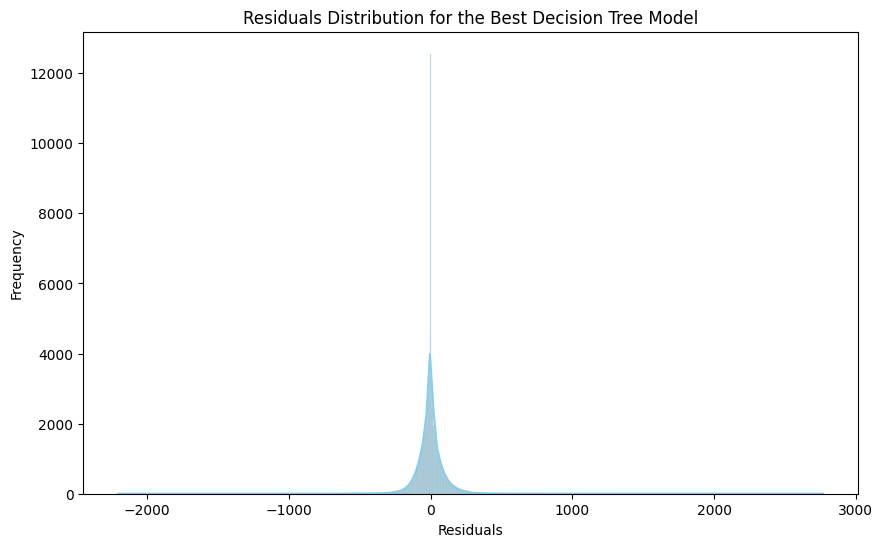

In [23]:
#Residuals
residuals = y_test - dt_best_pred

#Plotting the residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Residuals Distribution for the Best Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

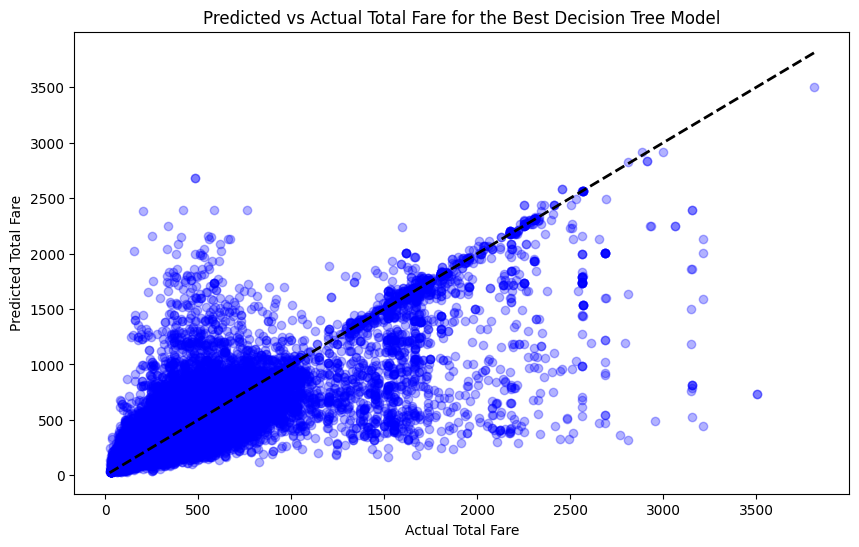

In [24]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_best_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Predicted vs Actual Total Fare for the Best Decision Tree Model')
plt.show()

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
# Random Forest Hyperparameter Tuning
print("\n--- Random Forest Hyperparameter Tuning ---")
rf_param_grid = {
    'n_estimators': [150, 200, 300],  
    'max_depth': [22, 23, 24, 25], 
    'min_samples_split': [5, 10, 15],  
    'min_samples_leaf': [2, 4, 6],  
    'max_features': ['sqrt'],  
    'bootstrap': [True]  
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

print("Training Random Forest models...")
start_time = time.time()
rf_grid.fit(X_train_sample, y_train_sample)
rf_tuning_time = time.time() - start_time
print(f"Random Forest tuning completed in {rf_tuning_time:.2f} seconds")

print("Best Random Forest parameters:")
print(rf_grid.best_params_)
print(f"Best CV score: {-rf_grid.best_score_:.4f} RMSE")


--- Random Forest Hyperparameter Tuning ---
Training Random Forest models...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest tuning completed in 486.53 seconds
Best Random Forest parameters:
{'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best CV score: 81.4755 RMSE


In [31]:
# Saving best Random Forest model
best_rf = rf_grid.best_estimator_
best_rf.fit(X_train, y_train)  # Refit on full training data
rf_val_pred, rf_val_mae, rf_val_rmse, rf_val_mape, rf_val_r2 = evaluate_model(
    best_rf, X_test, y_test, "Best Random Forest (Validation)"
)


Best Random Forest (Validation) Performance Metrics:
Mean Absolute Error: 64.9993
Root Mean Squared Error: 118.4594
Mean Absolute Percentage Error: 21.5285%
R² Score: 0.7454


In [ ]:
rf_small = RandomForestRegressor(
    bootstrap= True, 
    max_depth= 24, 
    max_features= 'sqrt', 
    min_samples_leaf= 2, 
    min_samples_split= 5, 
    n_estimators= 47,
    n_jobs=-1,
    random_state=42
)

rf_small.fit(X_train, y_train)

train_pred = rf_small.predict(X_train)
test_pred = rf_small.predict(X_test)

# Calculate accuracy
train_acc = r2_score(y_train, train_pred)
test_acc = r2_score(y_test, test_pred)

# Print train and test accuracy
print(f"Train R2: {train_acc}")
print(f"Test R2: {test_acc}")

evaluate_model(rf_small, X_test, y_test, "RF-Small")

Train R2: 0.807625196634446
Test R2: 0.7322044419541105

RF-Small Performance Metrics:
Mean Absolute Error: 67.2800
Root Mean Squared Error: 121.4857
Mean Absolute Percentage Error: 22.3776%
R² Score: 0.7322


(array([251.61037903, 700.68402944, 414.73059098, ..., 210.16770868,
        227.11868939, 338.77132787]),
 67.28000839602858,
 np.float64(121.48566384352057),
 0.2237761824648766,
 0.7322044419541105)

In [56]:
import joblib
joblib.dump(rf_small, "random_forest_model.pkl", compress=5)  # `compress=3` balances size & speed

['random_forest_model.pkl']

In [ ]:
# Load the trained model
model = joblib.load("random_forest_model.pkl")

# Extract the feature order from the model
feature_order = model.feature_names_in_

# Save feature order to a new file
joblib.dump(feature_order, "feature_order.pkl")


✅ New feature_order.pkl file saved!


In [ ]:
# Identify relevant columns
travel_columns = ["travelDistance", "travelDuration"]
starting_airports = [col for col in df_sample.columns if col.startswith("startingAirport_")]
destination_airports = [col for col in df_sample.columns if col.startswith("destinationAirport_")]

# Function to extract airport names from one-hot encoding
def get_airport_from_onehot(row, airport_columns, prefix):
    for col in airport_columns:
        if row[col] == 1:
            return col.replace(prefix, "")
    return None

# Extract unique travel data
df_sample["Origin"] = df_sample.apply(lambda row: get_airport_from_onehot(row, starting_airports, "startingAirport_"), axis=1)
df_sample["Destination"] = df_sample.apply(lambda row: get_airport_from_onehot(row, destination_airports, "destinationAirport_"), axis=1)

# Keep only rows with valid origin and destination
df_valid_travel = df_sample.dropna(subset=["Origin", "Destination"])[["Origin", "Destination", "travelDistance", "travelDuration"]]

# Group by (Origin, Destination) and compute median for distance & duration
df_median_travel = df_valid_travel.groupby(["Origin", "Destination"]).median().reset_index()

# Convert to dictionary format
TRAVEL_DATA = {
    (row["Origin"], row["Destination"]): {
        "distance": row["travelDistance"],
        "duration": row["travelDuration"],
    }
    for _, row in df_median_travel.iterrows()
}

# Convert dictionary to DataFrame for review
df_travel_data = pd.DataFrame(
    [(k[0], k[1], v["distance"], v["duration"]) for k, v in TRAVEL_DATA.items()],
    columns=["Origin", "Destination", "Distance", "Duration"],
)

# Display the resulting DataFrame
df_travel_data

,Origin,Destination,Distance,Duration
0,BOS,CLT,730.0,300.0
1,BOS,DEN,1806.0,458.0
2,BOS,DFW,1565.0,426.0
3,BOS,DTW,727.0,332.0
4,BOS,EWR,185.0,99.0
...,...,...,...,...
199,SFO,LGA,2647.0,572.0
200,SFO,MIA,2731.0,631.0
201,SFO,OAK,677.0,406.0
202,SFO,ORD,1927.0,401.0


In [ ]:
TRAVEL_DATA = {
    (row["Origin"], row["Destination"]): {
        "distance": row["Distance"],
        "duration": row["Duration"],
    }
    for _, row in df_travel_data.iterrows()
}

In [79]:
import json

# Convert tuple keys to string keys for JSON serialization
TRAVEL_DATA_JSON = {
    f"{origin}_{destination}": data for (origin, destination), data in TRAVEL_DATA.items()
}

# Save TRAVEL_DATA as a JSON file
with open("travel_data.json", "w") as f:
    json.dump(TRAVEL_DATA_JSON, f)

In [81]:
# Dictionary of holiday dates
HOLIDAY_DATES = {
    "Easter Sunday": "2022-04-17",
    "Independence Day": "2022-07-04",
    "Mother's Day": "2022-05-08",
    "Labor Day": "2022-09-05",
    "Columbus Day": "2022-10-10",
    "Veterans Day": "2022-11-11"
}


In [83]:
# Save TRAVEL_DATA as a JSON file
with open("holiday_dates.json", "w") as f:
    json.dump(HOLIDAY_DATES, f)

In [ ]:
#Running the model with the best parameters on the whole dataset
rf_best = RandomForestRegressor(random_state=42, n_jobs=-1, **rf_grid.best_params_)
rf_best.fit(X_train, y_train)
rf_best_pred, rf_best_mae, rf_best_rmse, rf_best_mape, rf_best_r2 = evaluate_model(rf_best, X_test, y_test, "Best Random Forest")

#Saving the model results
model_results["Model"].extend(["Random Forest", "Best Random Forest", "Best Random Forest (Validation)"])
model_results["MAE"].extend([mae, rf_best_mae, rf_val_mae])
model_results["RMSE"].extend([rmse, rf_best_rmse, rf_val_rmse])
model_results["MAPE"].extend([mape, rf_best_mape, rf_val_mape])
model_results["R²"].extend([r2, rf_best_r2, rf_val_r2])


Best Random Forest Performance Metrics:
Mean Absolute Error: 44.8739
Root Mean Squared Error: 93.7698
Mean Absolute Percentage Error: 14.1297%
R² Score: 0.8405


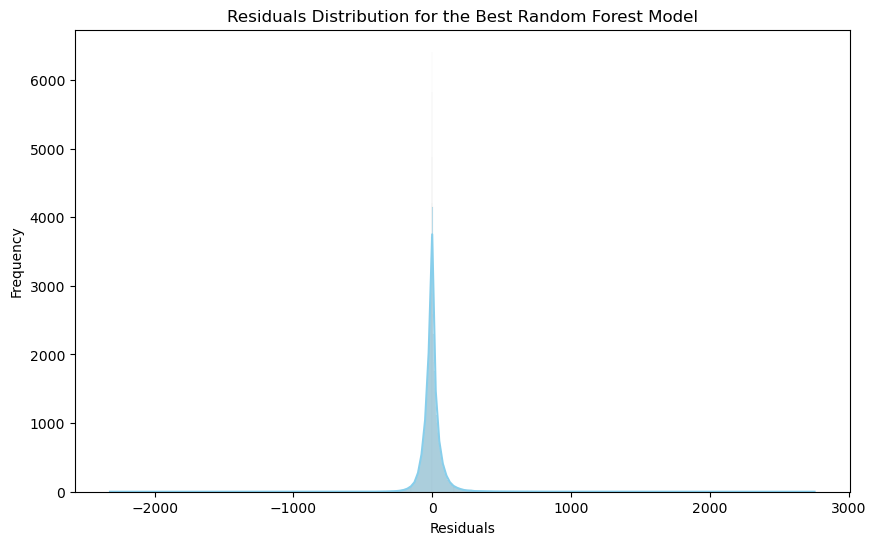

In [ ]:
#Residuals
residuals_rf = y_test - rf_best_pred

#Plotting the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='skyblue')
plt.title("Residuals Distribution for the Best Random Forest Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

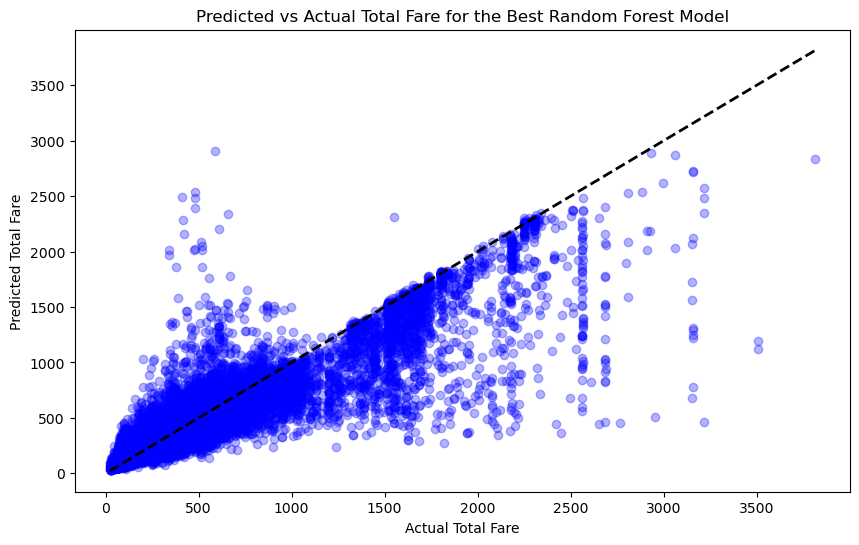

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_best_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Predicted vs Actual Total Fare for the Best Random Forest Model')
plt.show()

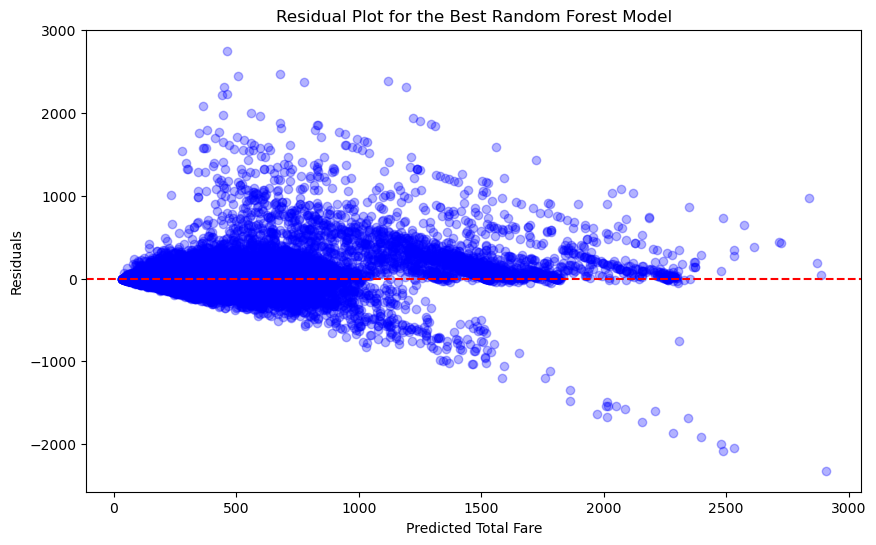

In [ ]:
#Residual Plot to check the distribution of errors
plt.figure(figsize=(10, 6))
plt.scatter(rf_best_pred, residuals_rf, alpha=0.3, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot for the Best Random Forest Model")
plt.xlabel("Predicted Total Fare")
plt.ylabel("Residuals")
plt.show()

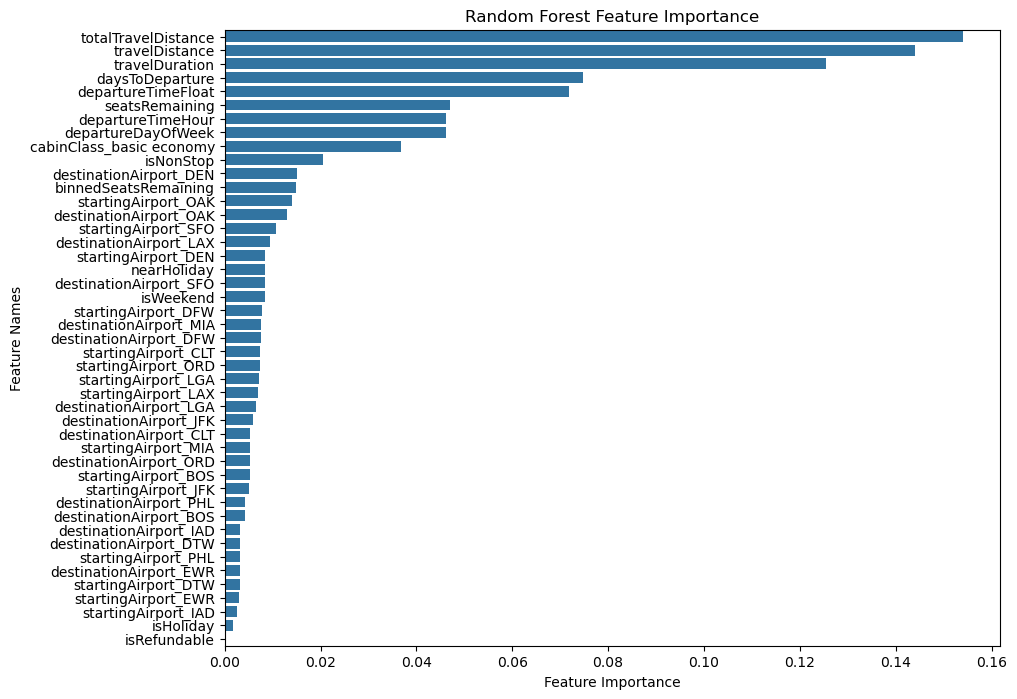

In [ ]:
#Feature Importance Visualization
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

plot_feature_importance(best_rf.feature_importances_, X_train.columns, 'Random Forest')

# XG Boost

In [ ]:
# XGBoost Hyperparameter Tuning
print("\n--- XGBoost Hyperparameter Tuning ---")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Training XGBoost models...")
start_time = time.time()
xgb_grid.fit(X_train_sample, y_train_sample)
xgb_tuning_time = time.time() - start_time
print(f"XGBoost tuning completed in {xgb_tuning_time:.2f} seconds")

print("Best XGBoost parameters:")
print(xgb_grid.best_params_)
print(f"Best CV score: {-xgb_grid.best_score_:.4f} RMSE")


--- XGBoost Hyperparameter Tuning ---
Training XGBoost models...
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
XGBoost tuning completed in 127.49 seconds
Best XGBoost parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.9}
Best CV score: 123.2182 RMSE


In [ ]:
# Saving best XGBoost model
best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_train, y_train)  
xgb_val_pred, xgb_val_mae, xgb_val_rmse, xgb_val_mape, xgb_val_r2 = evaluate_model(
    best_xgb, X_test, y_test, "Best XGBoost (Validation)"
)


Best XGBoost (Validation) Performance Metrics:
Mean Absolute Error: 56.6011
Root Mean Squared Error: 99.7094
Mean Absolute Percentage Error: 18.6989%
R² Score: 0.8196


In [ ]:
#Running the model with the best parameters on the whole dataset
xgb_best = XGBRegressor(random_state=42, n_jobs=-1, **xgb_grid.best_params_)
xgb_best.fit(X_train, y_train)
xgb_best_pred, xgb_best_mae, xgb_best_rmse, xgb_best_mape, xgb_best_r2 = evaluate_model(xgb_best, X_test, y_test, "Best XGBoost")

#Saving the model results
model_results["Model"].extend(["XGBoost", "Best XGBoost", "Best XGBoost (Validation)"])
model_results["MAE"].extend([mae, xgb_best_mae, xgb_val_mae])
model_results["RMSE"].extend([rmse, xgb_best_rmse, xgb_val_rmse])
model_results["MAPE"].extend([mape, xgb_best_mape, xgb_val_mape])
model_results["R²"].extend([r2, xgb_best_r2, xgb_val_r2])


Best XGBoost Performance Metrics:
Mean Absolute Error: 56.6011
Root Mean Squared Error: 99.7094
Mean Absolute Percentage Error: 18.6989%
R² Score: 0.8196


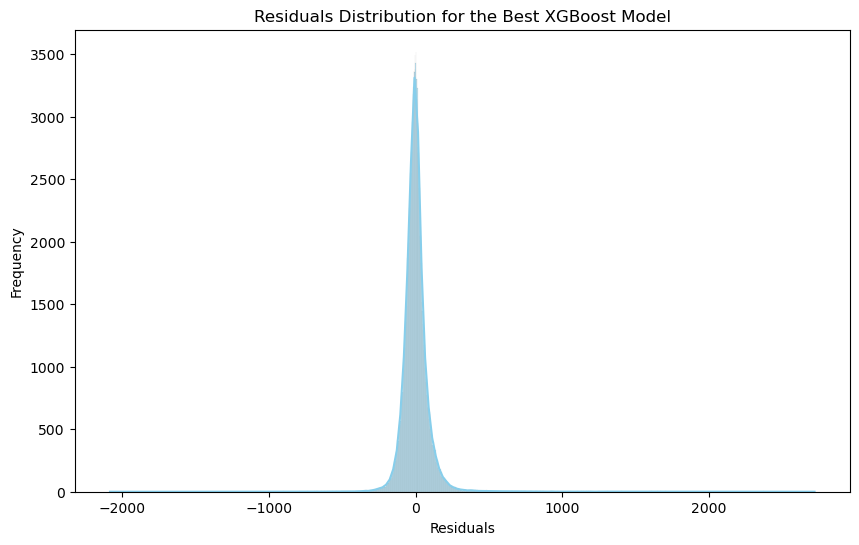

In [ ]:
#Residuals
residuals_xgb = y_test - xgb_best_pred

#Plotting the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='skyblue')
plt.title("Residuals Distribution for the Best XGBoost Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

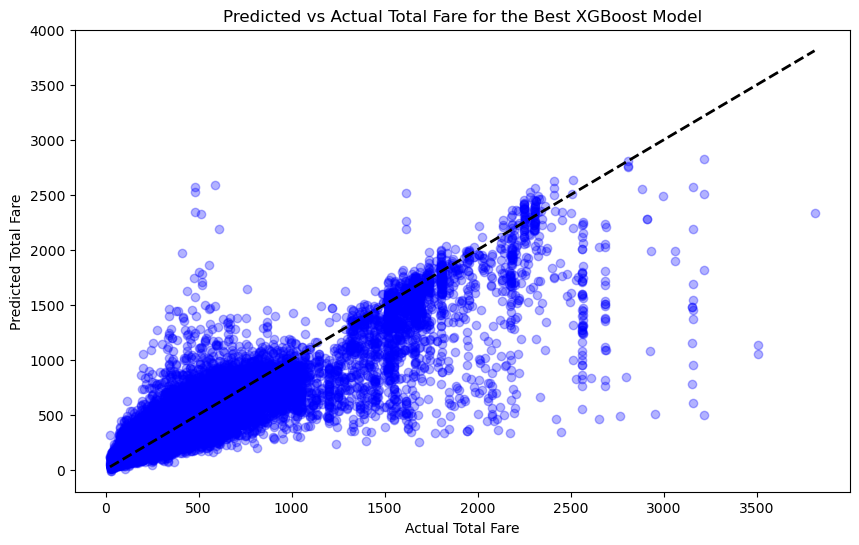

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_best_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Predicted vs Actual Total Fare for the Best XGBoost Model')
plt.show()

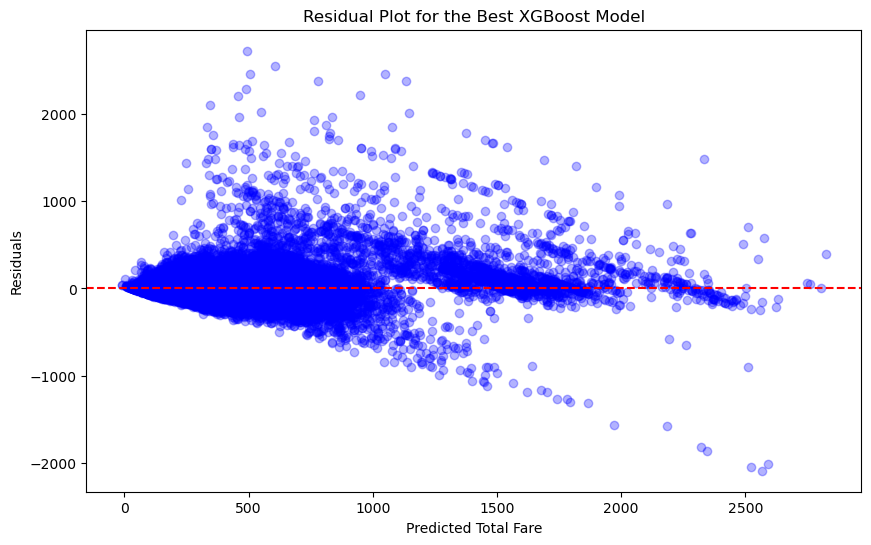

In [ ]:
#Residual Plot to check the distribution of errors
plt.figure(figsize=(10, 6))
plt.scatter(xgb_best_pred, residuals_xgb, alpha=0.3, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot for the Best XGBoost Model")
plt.xlabel("Predicted Total Fare")
plt.ylabel("Residuals")
plt.show()

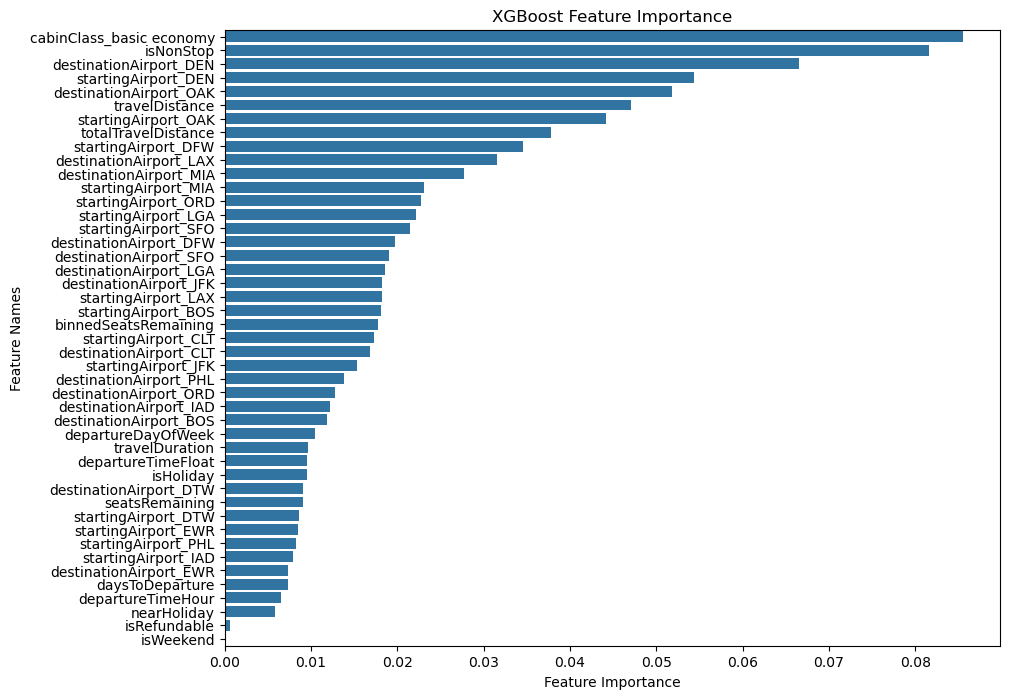

In [ ]:
#Feature Importance Visualization
plot_feature_importance(best_xgb.feature_importances_, X_train.columns, 'XGBoost')

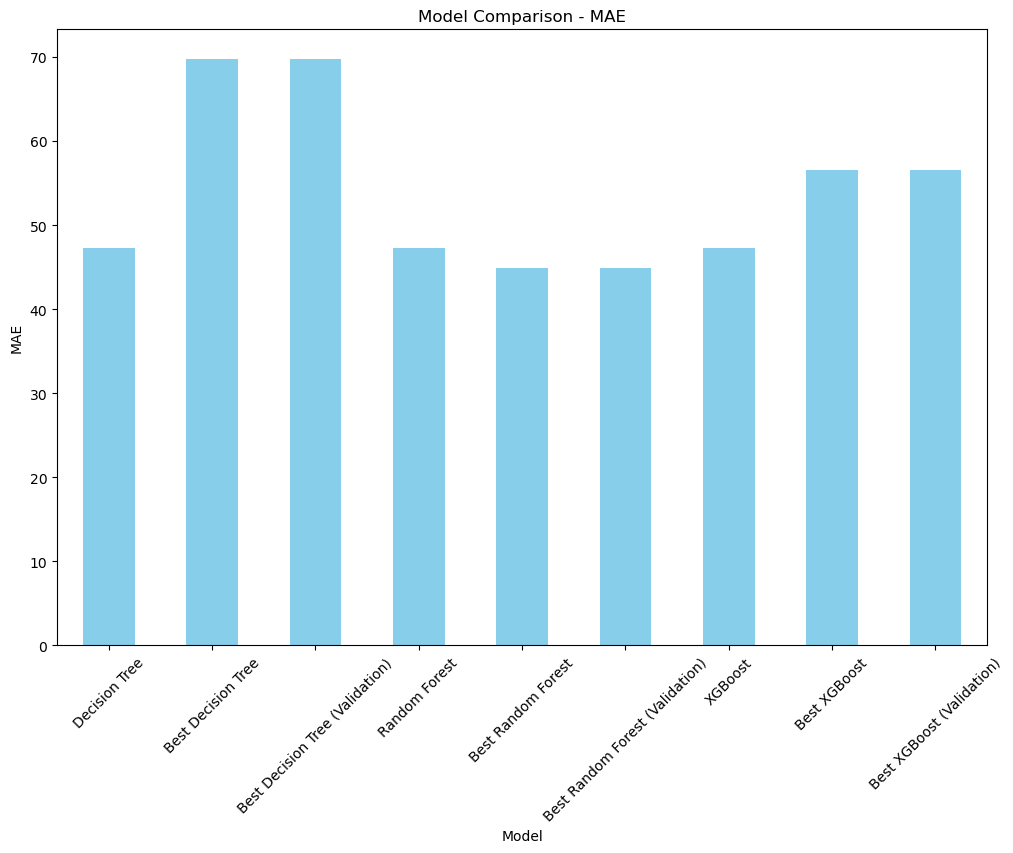

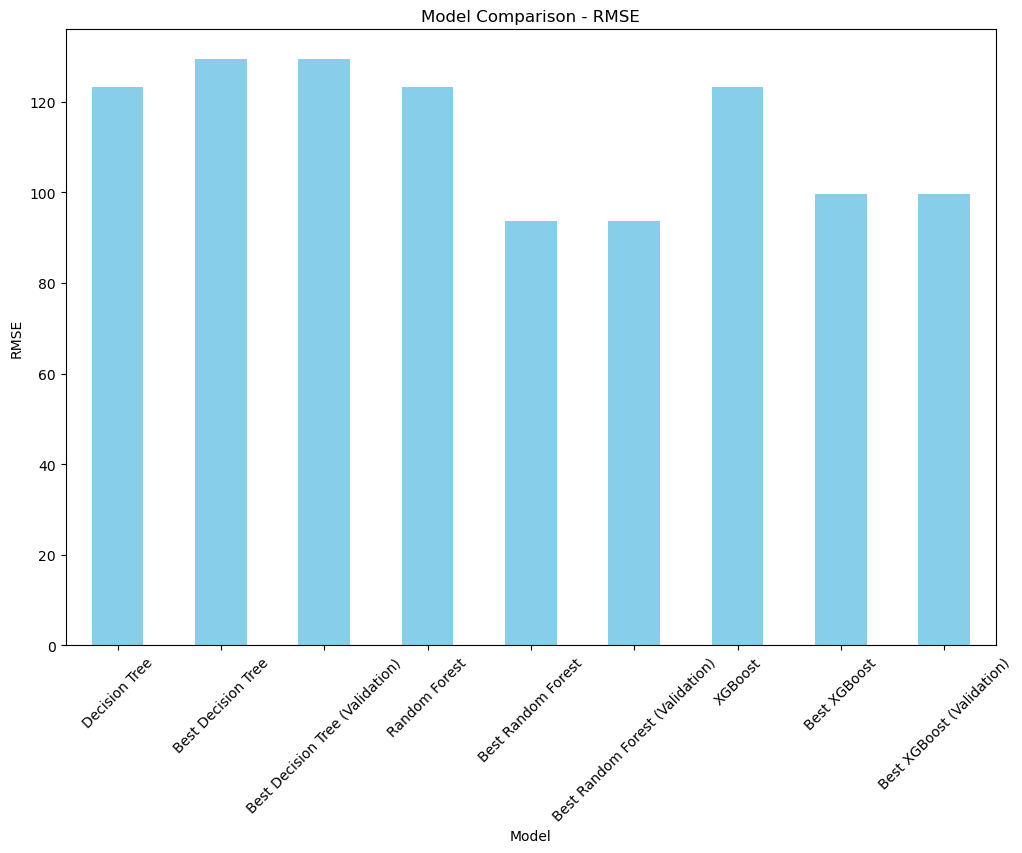

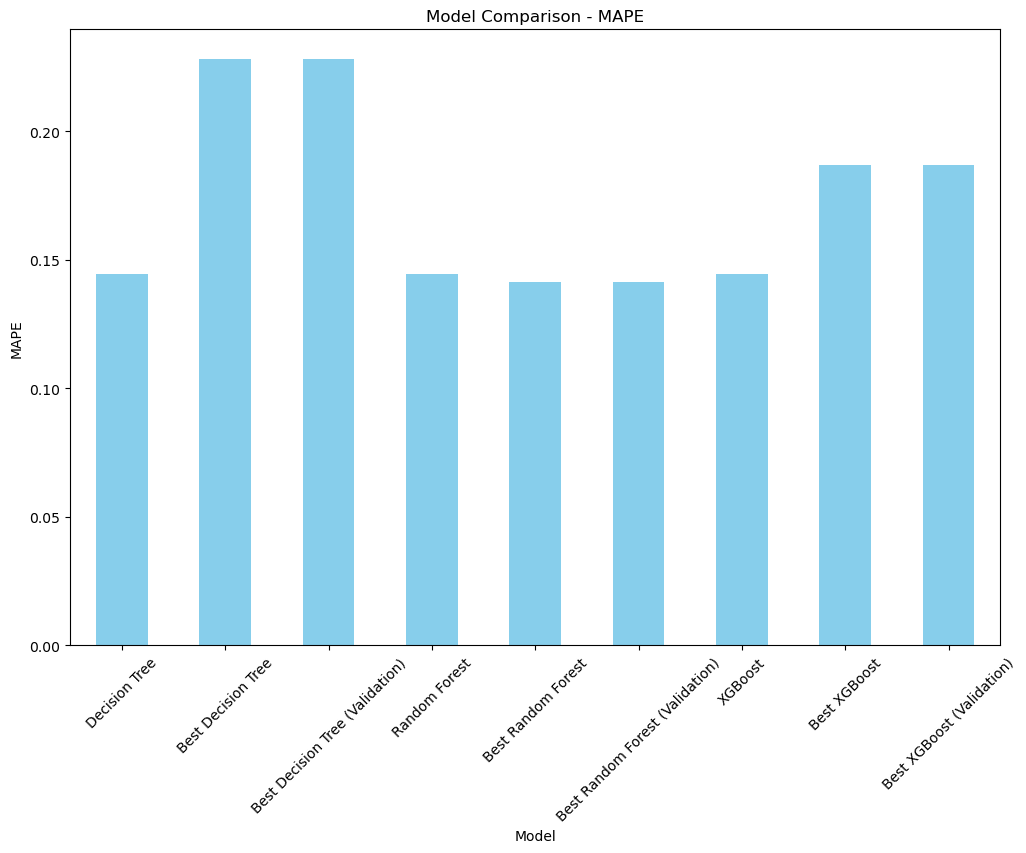

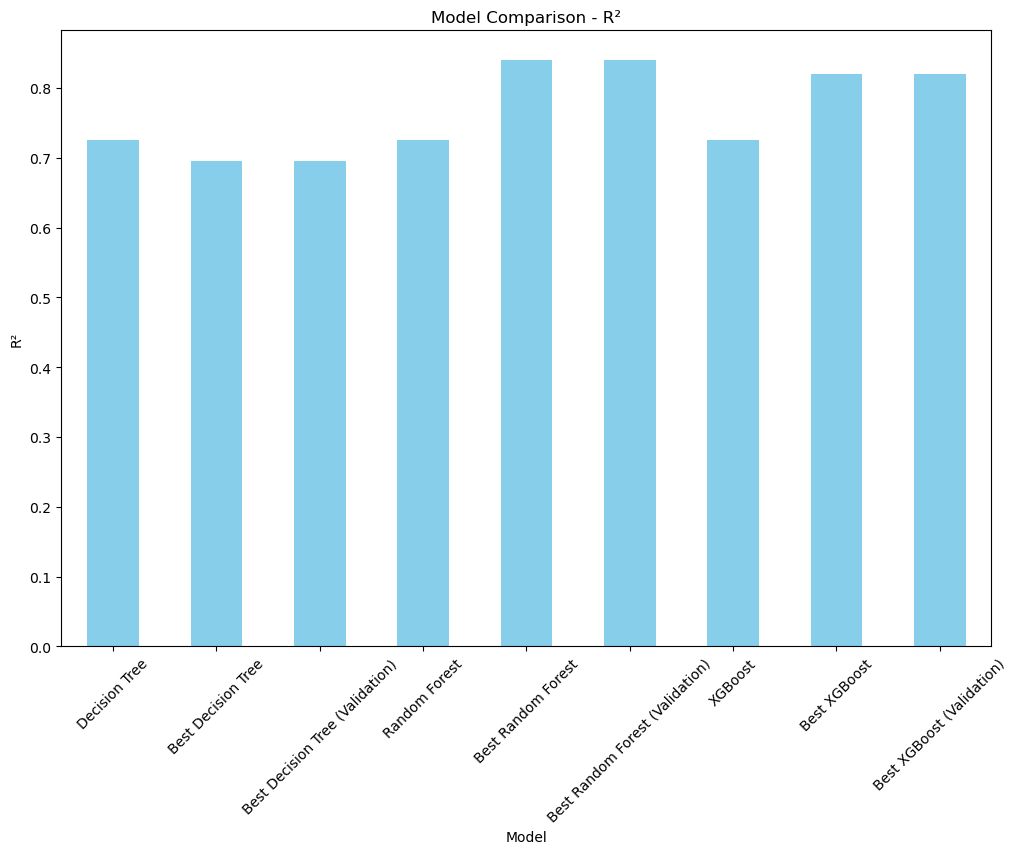

In [ ]:
# Plotting each metric separately
metrics = ['MAE', 'RMSE', 'MAPE', 'R²']

for metric in metrics:
    plt.figure(figsize=(12, 8))
    model_results_df[metric].plot(kind='bar', color='skyblue')
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
#Table for all the model validations
model_results_df = pd.DataFrame(model_results)
model_results_df.set_index('Model', inplace=True)
model_results_df

,MAE,RMSE,MAPE,R²
Model,,,,
Decision Tree,47.313173,123.144529,0.144501,0.724841
Best Decision Tree,69.789743,129.464342,0.228195,0.695874
Best Decision Tree (Validation),69.789743,129.464342,0.228195,0.695874
Random Forest,47.313173,123.144529,0.144501,0.724841
Best Random Forest,44.873878,93.769835,0.141297,0.840456
Best Random Forest (Validation),44.873878,93.769835,0.141297,0.840456
XGBoost,47.313173,123.144529,0.144501,0.724841
Best XGBoost,56.601105,99.709427,0.186989,0.819604
Best XGBoost (Validation),56.601105,99.709427,0.186989,0.819604


# RNN

In [ ]:
#%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Dataset 
df = load_data()

In [ ]:
# Hot encode only for the categorical columns
categorical_columns = ['startingAirport', 'destinationAirport', 'segmentsAirlineCode', 'segmentsCabinCode']
df = add_dummies(df, cols=categorical_columns)

In [ ]:
# Split the data into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
# Remove non-numeric columns
train_numeric = train.select_dtypes(include=[np.number])
test_numeric = test.select_dtypes(include=[np.number])

# Normalization
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_numeric)
test_scaled = scaler.transform(test_numeric)

X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]

In [ ]:
# Run a RNN model with LSTM
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)


Epoch 1/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 511s 247us/step - loss: nan
Epoch 2/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 507s 247us/step - loss: nan
Epoch 3/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 502s 244us/step - loss: nan
Epoch 4/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 499s 243us/step - loss: nan
Epoch 5/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 499s 243us/step - loss: nan
Epoch 6/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 527s 256us/step - loss: nan
Epoch 7/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 518s 252us/step - loss: nan
Epoch 8/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 525s 255us/step - loss: nan
Epoch 9/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 506s 246us/step - loss: nan
Epoch 10/10
2053469/2053469 ━━━━━━━━━━━━━━━━━━━━ 490s 238us/step - loss: nan
513368/513368 ━━━━━━━━━━━━━━━━━━━━ 77s 150us/step


In [ ]:
# Inverse transform the predictions
y_pred_inv = np.concatenate((y_pred, X_test), axis=1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)
y_pred_inv = y_pred_inv[:, 0]

# Inverse transform the actual values
y_test_inv = np.concatenate((y_test.reshape(-1, 1), X_test), axis=1)
y_test_inv = scaler.inverse_transform(y_test_inv)
y_test_inv = y_test_inv[:, 0]

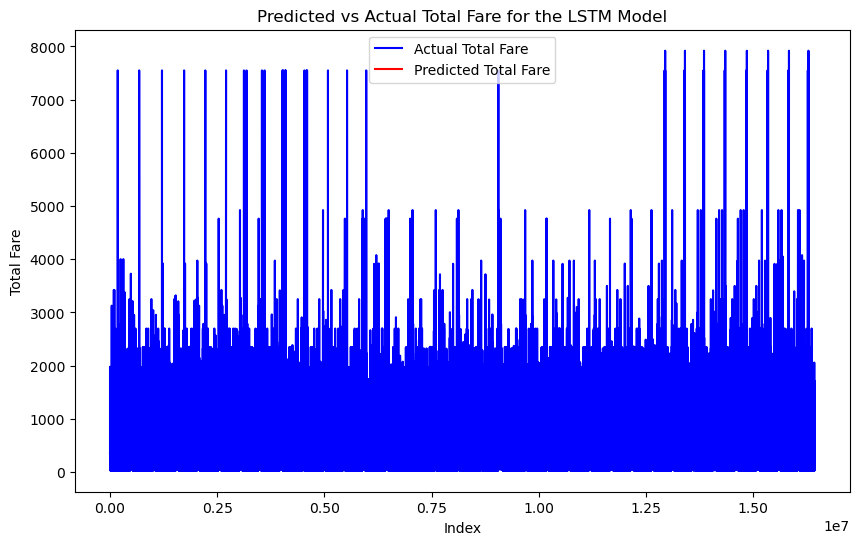

In [ ]:
#Plot the predicted vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Total Fare', color='blue')
plt.plot(y_pred_inv, label='Predicted Total Fare', color='red')
plt.title('Predicted vs Actual Total Fare for the LSTM Model')
plt.xlabel('Index')
plt.ylabel('Total Fare')
plt.legend()
plt.show()

In [ ]:
# Handle NaN values in predictions
y_pred_inv = np.nan_to_num(y_pred_inv, nan=np.nanmean(y_test_inv))

# Calculate the error metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

# Print the error metrics using four decimal places
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Sqaured Error: {mse:.4f}")
print(f"Root Mean Squared Error {rmse:0.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4%}")

Mean Absolute Error: 139.4432
Mean Sqaured Error: 34220.1336
Root Mean Squared Error 184.9868
Mean Absolute Percentage Error: 66.3469%
